In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

import datetime
import matplotlib.dates as mdates

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = [15, 10]

# Key business questions

**As a gaming company**
1. What should a company make for their next game?
2. Compare free to play games and paid games in terms of `total_revenue` and `ratings` 

    Definitions:
    \begin{align}
    \text{total revenue} &= \text{midpoint of owners} \times \text{price}
    \end{align}
    
    \begin{align}
    \text{ratings} &= \frac{\text{positive ratings}}{\text{total ratings}} \times 100
    \end{align}
    
    Let's use $\geq 80\%$ as high score?
3. What are the kind of paid games with lowest `total_revenue` and `ratings`?

---
**As an avid gamer**
1. What gaming companies should a gamer look out for?
2. What games have a high `total_revenue`, `ratings`, and is owned by at least $10$ million gamers?
3. Analyze the `average_playtime` by `year` (create a trend line).

---
**As a parent of a gamer**
1. Are we assured that games for 3 to 16 years old and games with no `restricted_age` are child-friendly?
    Definitions:
    Child-friendly - Games with no violence, gore, nudity or sexual content

    To do:
    Look for violent, gore, nudity or sexual content `genres` for games that have no `restricted_age` and
    games for 3 to 16 years old.

    We can also check in `steamspy_tags` but it has 339 tags.

2. What is the average `price` of games for 3 to 16 years old and games with no `required_age` and are also child-friendly?

3. What are some educational (`education` in `genres`) games for 3 to 16 years old and games with no age restrictions?


# Understanding the data

## Loading the dataframe

In [2]:
steam_df = pd.read_csv('steam.csv')
steam_df = steam_df[steam_df['english'] == True]
steam_df = steam_df.drop(columns='english').reset_index(drop=True)
steam_df

,appid,name,release_date,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26559,1065230,Room of Pandora,2019-04-24,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
26560,1065570,Cyber Gun,2019-04-23,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
26561,1065650,Super Star Blast,2019-04-24,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
26562,1066700,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


## Checking for missing data

In [3]:
steam_df.isna().sum()

appid               0
name                0
release_date        0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [4]:
steam_df.dtypes

appid                 int64
name                 object
release_date         object
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

### Check for duplicated game `name`s

In [5]:
steam_df[steam_df['name'].duplicated()]

,appid,name,release_date,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
4661,345130,Dark Matter,2015-02-27,Meridian4,Meridian4,windows,0,Single-player;Partial Controller Support,Action;Casual;Indie,Action;Casual;Indie,0,75,50,0,0,100000-200000,3.99
7888,436260,Ultimate Arena,2016-09-05,Kenneth Caselli;Gianmarco Rocco,AceGamer Network,windows;linux,0,Multi-player;Online Multi-Player;Steam Achieve...,Action;Indie,Action;Indie;FPS,1,123,100,0,0,0-20000,13.99
8202,446480,New York Bus Simulator,2016-03-04,Little Freedom Factory,United Independent Entertainment GmbH,windows,0,Single-player,Simulation,Simulation,0,7,42,0,0,0-20000,3.99
9443,488080,Taxi,2016-10-07,petraguardsoftware.com,petraguardsoftware.com,windows,0,Single-player;Steam Achievements;Steam Cloud,Casual,Casual,11,1,1,0,0,0-20000,1.59
10306,510850,Mars 2030,2017-07-31,FMG Labs,Fusion Media Group,windows,0,Single-player;Steam Achievements;Full controll...,Simulation,Simulation;Mars;Space,10,40,22,0,0,0-20000,10.99
11400,542220,Rumpus,2017-04-12,Polyraptor Games,Polyraptor Games,windows;mac;linux,0,Single-player;Local Multi-Player;Local Co-op;S...,Action;Casual;Indie,Action;Indie;Casual,19,23,0,0,0,0-20000,9.99
14211,622810,Invasion,2018-06-15,brutalsoft,brutalsoft,windows,0,Single-player;Steam Achievements;Steam Cloud,Action;Indie,Action;Indie;Arcade,19,24,1,0,0,0-20000,3.99
15435,664780,Alter Ego,2017-08-08,Choose Multiple LLC,Choose Multiple LLC,windows;mac;linux,0,Single-player;Captions available;Steam Cloud,Adventure;Casual;Indie;RPG;Simulation,RPG;Casual;Simulation,0,17,8,0,0,0-20000,5.59
15508,666660,Castles,2017-07-14,Quicksilver Software,interplay,windows;mac,0,Single-player,Adventure;Strategy,Strategy;Adventure,0,2,3,0,0,0-20000,6.99
15513,666810,Luna,2017-08-15,Lushboy Studios,Lushboy Studios,windows;mac,0,Single-player;Partial Controller Support,Action;Indie,Action;Indie;Puzzle-Platformer,19,10,0,0,0,0-20000,0.79


## Cleaning data

### Games whose `name`, `developer`, or `publisher` contain non-ASCII characters.

In [6]:
steam_df[~(steam_df['name'].map(str.isascii) & 
          steam_df['developer'].map(str.isascii) & 
          steam_df['publisher'].map(str.isascii))]['name']

62          Gumboy - Crazy Adventures™
65                                GUN™
66                       Call of Duty®
67                     Call of Duty® 2
81                          FlatOut 2™
                     ...              
26507            10-4 Indirect Contact
26527     Twinkle Star - 未来はすぐそこで待っている
26532     胜利即正义! / Victory is justice！
26535    The Underground Watcher/地下监察员
26550                   Blacksmith Run
Name: name, Length: 1628, dtype: object

### Converting `release_date` to `datetime`

In [7]:
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])
steam_df['release_date'].dtype

dtype('<M8[ns]')

### Checking the binning of `owners`

In [8]:
pd.Series(steam_df['owners'].unique())

0       10000000-20000000
1        5000000-10000000
2         2000000-5000000
3       20000000-50000000
4     100000000-200000000
5      50000000-100000000
6             20000-50000
7          500000-1000000
8           100000-200000
9            50000-100000
10        1000000-2000000
11          200000-500000
12                0-20000
dtype: object

### Taking the floor `owners`

In [9]:
floor_owners = np.array([10_000_000, 5_000_000, 2_000_000, 20_000_000, 
                         100_000_000, 50_000_000, 20_000, 500_000, 100_000, 
                         50_000, 1_000_000, 200_000, 0])

floor_owner_dict = dict(zip(steam_df['owners'].unique(), floor_owners))
floor_owner_dict

{'10000000-20000000': 10000000,
 '5000000-10000000': 5000000,
 '2000000-5000000': 2000000,
 '20000000-50000000': 20000000,
 '100000000-200000000': 100000000,
 '50000000-100000000': 50000000,
 '20000-50000': 20000,
 '500000-1000000': 500000,
 '100000-200000': 100000,
 '50000-100000': 50000,
 '1000000-2000000': 1000000,
 '200000-500000': 200000,
 '0-20000': 0}

In [10]:
ave_owners = np.array([15_000_000, 7_500_000, 3_500_000, 35_000_000, 
                       150_000_000, 75_000_000, 35_000, 750_000, 150_000, 
                       75_000, 1_500_000, 350_000, 10_000])

ave_owner_dict = dict(zip(steam_df['owners'].unique(), ave_owners))
ave_owner_dict

{'10000000-20000000': 15000000,
 '5000000-10000000': 7500000,
 '2000000-5000000': 3500000,
 '20000000-50000000': 35000000,
 '100000000-200000000': 150000000,
 '50000000-100000000': 75000000,
 '20000-50000': 35000,
 '500000-1000000': 750000,
 '100000-200000': 150000,
 '50000-100000': 75000,
 '1000000-2000000': 1500000,
 '200000-500000': 350000,
 '0-20000': 10000}

In [11]:
steam_df = steam_df.replace({'owners': ave_owner_dict})

## Statistics

In [12]:
steam_df.drop(columns=['appid']).describe()

,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
count,26564.000000,26564.000000,2.656400e+04,26564.000000,26564.000000,26564.000000,2.656400e+04,26564.000000
mean,0.355858,45.939580,1.016363e+03,214.417633,149.890717,144.940747,1.360834e+05,6.086621
std,2.408144,355.995119,1.916965e+04,4325.838838,1824.209705,2334.541203,1.340513e+06,7.877340
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+04,0.000000
25%,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.000000e+04,1.690000
50%,0.000000,7.000000,2.500000e+01,9.000000,0.000000,0.000000,1.000000e+04,3.990000
75%,0.000000,23.000000,1.270000e+02,42.000000,0.000000,0.000000,3.500000e+04,7.190000
max,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,1.500000e+08,421.990000


# Feature engineering

In [13]:
# New dataframe to store new features (mergable by `name`)
extra_df = steam_df['appid'].to_frame()
extra_df

,appid
0,10
1,20
2,30
3,40
4,50
...,...
26559,1065230
26560,1065570
26561,1065650
26562,1066700


## `price_range`
---
**Outlier treatment proposition.**

Games priced above $50$ GBP are outliers. Only a few gamers can afford such high prices.

In [14]:
# 1 GBP to PHP conversion for potential analysis
GBP_to_PHP = 65.37

# Custom binning to categorize price range
price_binning = np.linspace(0, 422, 20)
price_binning = np.array([-0.1, 0.31, 40, 50, 100, 422])

extra_df['price_range'] = pd.cut(steam_df['price'], price_binning)
extra_df

,appid,price_range
0,10,"(0.31, 40.0]"
1,20,"(0.31, 40.0]"
2,30,"(0.31, 40.0]"
3,40,"(0.31, 40.0]"
4,50,"(0.31, 40.0]"
...,...,...
26559,1065230,"(0.31, 40.0]"
26560,1065570,"(0.31, 40.0]"
26561,1065650,"(0.31, 40.0]"
26562,1066700,"(0.31, 40.0]"


## `release_year`

In [15]:
extra_df['release_year'] = steam_df['release_date'].dt.year
extra_df

,appid,price_range,release_year
0,10,"(0.31, 40.0]",2000
1,20,"(0.31, 40.0]",1999
2,30,"(0.31, 40.0]",2003
3,40,"(0.31, 40.0]",2001
4,50,"(0.31, 40.0]",1999
...,...,...,...
26559,1065230,"(0.31, 40.0]",2019
26560,1065570,"(0.31, 40.0]",2019
26561,1065650,"(0.31, 40.0]",2019
26562,1066700,"(0.31, 40.0]",2019


## `total_ratings`
---
**Outlier treatment proposition.**

Set a lower bound within the range of `total_ratings` values to check only relevant games.

In [16]:
extra_df['total_ratings'] = (steam_df['positive_ratings'] 
                            + steam_df['negative_ratings'])
extra_df

,appid,price_range,release_year,total_ratings
0,10,"(0.31, 40.0]",2000,127873
1,20,"(0.31, 40.0]",1999,3951
2,30,"(0.31, 40.0]",2003,3814
3,40,"(0.31, 40.0]",2001,1540
4,50,"(0.31, 40.0]",1999,5538
...,...,...,...,...
26559,1065230,"(0.31, 40.0]",2019,3
26560,1065570,"(0.31, 40.0]",2019,9
26561,1065650,"(0.31, 40.0]",2019,1
26562,1066700,"(0.31, 40.0]",2019,2


## `ratings`
---
**Outlier treatment proposition.**

$100\%$ `ratings` are outliers. In reality, this only happens if a game is so unknown that nobody actually plays it.

**Note.**

Set a threshold for the `total_ratings` for `ratings` that are valid/reflective of the game's success/popularity.

Try: `sns.histplot`

In [17]:
extra_df['ratings'] = round(steam_df['positive_ratings']
                           /extra_df['total_ratings']*100, 2)
extra_df['total_ratings']

0        127873
1          3951
2          3814
3          1540
4          5538
          ...  
26559         3
26560         9
26561         1
26562         2
26563         4
Name: total_ratings, Length: 26564, dtype: int64

## `total_revenue`
---
This is a proxy for total revenue data by multiplying the number of `owners` by the `price`.

**Note.**
- This is applicable only to paid games.
- Older games will naturally aggregate more total revenue through time.
- Players will almost always buy the game either on release or during Steam sales.

---
**Outlier treatment proposition.**

Set a lower bound within the range of `total_revenue` values to check only relevant games.

In [18]:
extra_df['total_revenue'] = steam_df['owners'] * steam_df['price']
extra_df

,appid,price_range,release_year,total_ratings,ratings,total_revenue
0,10,"(0.31, 40.0]",2000,127873,97.39,107850000.0
1,20,"(0.31, 40.0]",1999,3951,83.98,29925000.0
2,30,"(0.31, 40.0]",2003,3814,89.56,29925000.0
3,40,"(0.31, 40.0]",2001,1540,82.66,29925000.0
4,50,"(0.31, 40.0]",1999,5538,94.80,29925000.0
...,...,...,...,...,...,...
26559,1065230,"(0.31, 40.0]",2019,3,100.00,20900.0
26560,1065570,"(0.31, 40.0]",2019,9,88.89,16900.0
26561,1065650,"(0.31, 40.0]",2019,1,0.00,39900.0
26562,1066700,"(0.31, 40.0]",2019,2,100.00,51900.0


## Merge `steam_df` and `extra_df` by `app_id`

In [81]:
# main_df contains all existing and newly-engineered features.
main_df = steam_df.merge(extra_df, how='left')

main_df.to_csv('steam_for_tableau.csv', index=False)

# Univariate Analysis

## Counting values

### Number of games by `developer`

In [20]:
main_df['developer'].value_counts()

Choice of Games                                                                  94
Ripknot Systems                                                                  62
Laush Dmitriy Sergeevich                                                         51
Nikita "Ghost_RUS"                                                               50
Dexion Games                                                                     45
                                                                                 ..
Rixment                                                                           1
Studio spektar                                                                    1
Castle                                                                            1
Electric Eggplant;Kalani Games, Inc.;HRG (Heirs of Rube Goldberg);Unity Games     1
Adept Studios GD                                                                  1
Name: developer, Length: 16772, dtype: int64

### Number of games by `publisher`

In [44]:
main_df['publisher'].value_counts()

Big Fish Games             212
Strategy First             136
Ubisoft                    111
THQ Nordic                  98
Square Enix                 97
                          ... 
Green Willow Games, LLC      1
Worm Animation               1
Constructive Media           1
Himi Games                   1
SHEN JIAWEI                  1
Name: publisher, Length: 14057, dtype: int64

### Number of games by `required_age`

**Look this up online.**
- Who sets the binning the binning of age restriction?
- **Answer.** Entertainment Software Rating Board. Check this [link](https://pegi.info/what-do-the-labels-mean).

In [45]:
main_df['required_age'].value_counts()

0     25977
18      300
16      192
12       72
7        12
3        11
Name: required_age, dtype: int64

### Number of games by `owners`

In [23]:
main_df['owners'].value_counts()

10000        18166
35000         3016
75000         1676
150000        1373
350000        1268
750000         513
1500000        287
3500000        192
7500000         46
15000000        21
35000000         3
75000000         2
150000000        1
Name: owners, dtype: int64

### Number of games by `platforms`

In [24]:
main_df['platforms'].value_counts()

windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
mac                      3
mac;linux                1
linux                    1
Name: platforms, dtype: int64

### Number of games by `achievements`

**Potential insights.**
- There are certain genres that are only popular if they have a lot of achievements. Look into bivariate analysis.

In [25]:
main_df['achievements'].value_counts()

0       11540
10        671
12        611
20        562
15        488
        ...  
222         1
5394        1
678         1
2130        1
233         1
Name: achievements, Length: 409, dtype: int64

### Number of games by `categories`

Note that categories are not mutually exclusive. Therefore, the total count per category does not correspond to the total number of games, that is, some games may be counted in multiple categories.

#### Wrangling

In [26]:
# Find all unique categories
categories = np.array(list(set([cat for entry in main_df['categories']
                                .str.split(';').tolist() 
                                for cat in entry])))
pd.Series(categories)

0                   Multi-player
1            Online Multi-Player
2     Partial Controller Support
3     Cross-Platform Multiplayer
4             Steam Leaderboards
5                  Single-player
6                    Steam Cloud
7                   Online Co-op
8            Includes Source SDK
9           SteamVR Collectibles
10                Steam Workshop
11            Local Multi-Player
12            Mods (require HL2)
13         Includes level editor
14       Full controller support
15          Commentary available
16           Shared/Split Screen
17              In-App Purchases
18                   Local Co-op
19      Steam Turn Notifications
20                         Stats
21      Valve Anti-Cheat enabled
22                          Mods
23           Steam Trading Cards
24                           MMO
25            Captions available
26            Steam Achievements
27                         Co-op
28                    VR Support
dtype: object

#### Counting

In [27]:
# Number of games by unique combination of categories
cat_per_entry = main_df['categories'].value_counts()
cat_per_entry

Single-player                                                                                                                                           5911
Single-player;Steam Achievements                                                                                                                        2286
Single-player;Steam Achievements;Steam Trading Cards                                                                                                     843
Single-player;Partial Controller Support                                                                                                                 787
Single-player;Steam Trading Cards                                                                                                                        785
                                                                                                                                                        ... 
Single-player;Steam Achievements;Steam Trading Cards;Capti

In [28]:
# Number of games by category
cat_counts = (pd.DataFrame((cat, cat_per_entry[cat_per_entry
                                              .index
                                              .str.contains(cat)]
                           .sum()) for cat in categories)
              .rename(columns={0:'categories', 1:'count'})
              .set_index('categories')
              .squeeze().sort_values(ascending=False))

cat_percent = cat_counts/main_df.shape[0]*100
cat_percent

C:\Users\Jam\AppData\Local\Temp/ipykernel_19892/420599164.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  cat_counts = (pd.DataFrame((cat, cat_per_entry[cat_per_entry


categories
Single-player                 94.861467
Steam Achievements            52.605029
Steam Trading Cards           29.634091
Steam Cloud                   26.599910
Full controller support       21.348441
Partial Controller Support    15.731817
Multi-player                  14.869749
Steam Leaderboards            12.915977
Co-op                          9.753802
Online Multi-Player            9.215480
Shared/Split Screen            8.074838
Stats                          7.047131
Local Multi-Player             6.057070
Cross-Platform Multiplayer     4.050595
Online Co-op                   4.001656
Local Co-op                    3.975305
Includes level editor          3.892486
Steam Workshop                 3.357928
Captions available             2.702906
In-App Purchases               2.525975
MMO                            1.520855
VR Support                     0.869598
Commentary available           0.527029
Valve Anti-Cheat enabled       0.353862
Steam Turn Notifications     

### Number of games by `genres`

Note that genres are not mutually exclusive. Therefore, the total count per genre does not correspond to the total number of games, that is, some games may be counted in multiple genres.

#### Wrangling

In [29]:
genres = np.array(list(set([gen for entry in main_df['genres']
                                .str.split(';').tolist() 
                                for gen in entry])))
pd.Series(genres)

0              Early Access
1                Accounting
2                    Casual
3                 Utilities
4              Free to Play
5          Video Production
6                     Indie
7            Sexual Content
8         Software Training
9               Documentary
10                   Action
11                   Racing
12                 Strategy
13            Photo Editing
14                 Tutorial
15    Massively Multiplayer
16                     Gore
17                  Violent
18                Education
19           Web Publishing
20                   Sports
21                   Nudity
22    Design & Illustration
23     Animation & Modeling
24                      RPG
25               Simulation
26                Adventure
27         Audio Production
28         Game Development
dtype: object

#### Counting

In [30]:
# Number of games by unique combination of genres
gen_per_entry = main_df['genres'].value_counts()
gen_per_entry

Action;Indie                                                                 1840
Casual;Indie                                                                 1467
Action;Adventure;Indie                                                       1223
Adventure;Indie                                                              1148
Action;Casual;Indie                                                          1000
                                                                             ... 
Casual;Free to Play;Massively Multiplayer;Early Access                          1
Nudity;Adventure;Casual                                                         1
Casual;Free to Play;Indie;Racing;Early Access                                   1
Casual;Indie;Massively Multiplayer;Simulation;Early Access                      1
Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy       1
Name: genres, Length: 1528, dtype: int64

In [31]:
# Number of games by genres
gen_counts = (pd.DataFrame((gen, gen_per_entry[gen_per_entry
                                              .index
                                              .str.contains(gen)]
                           .sum()) for gen in genres)
              .rename(columns={0:'genres', 1:'count'})
              .set_index('genres')
              .squeeze().sort_values(ascending=False))

gen_percent = gen_counts/main_df.shape[0]*100
gen_percent

genres
Indie                    71.871706
Action                   44.481253
Casual                   37.750339
Adventure                36.884505
Strategy                 19.210209
Simulation               19.138684
RPG                      15.374191
Early Access             10.864328
Free to Play              6.192591
Sports                    4.957838
Racing                    3.843548
Violent                   3.132058
Massively Multiplayer     2.627616
Gore                      1.995181
Nudity                    0.967475
Sexual Content            0.895949
Utilities                 0.542087
Design & Illustration     0.323746
Animation & Modeling      0.293630
Education                 0.188225
Video Production          0.139286
Software Training         0.112935
Audio Production          0.105406
Web Publishing            0.101641
Game Development          0.060232
Photo Editing             0.041409
Accounting                0.018822
Documentary               0.003764
Tutorial     

### Number of games by `steamspy_tags`

Note that SteamSpy tags are not mutually exclusive. Therefore, the total count per SteamSpy tag does not correspond to the total number of games, that is, some games may be counted in multiple SteamSpy tags.

#### Wrangling

In [32]:
tags = np.array(list(set([tag for entry in main_df['steamspy_tags']
                                .str.split(';').tolist() 
                                for tag in entry])))
pd.Series(tags)

0      Turn-Based Strategy
1         Top-Down Shooter
2                Utilities
3               Text-Based
4          Time Management
              ...         
334         Pixel Graphics
335               Cartoony
336            Atmospheric
337              Space Sim
338                  Movie
Length: 339, dtype: object

#### Counting

In [33]:
# Number of games by unique combination of tags
tag_per_entry = main_df['steamspy_tags'].value_counts()
tag_per_entry

Action;Indie;Casual                      840
Action;Adventure;Indie                   711
Early Access;Action;Indie                502
Adventure;Indie;Casual                   430
Indie;Casual                             373
                                        ... 
Action;Sports;FPS                          1
Racing;Casual;Sports                       1
Casual;Match 3;Action                      1
Bullet Hell;Co-op;Shoot 'Em Up             1
Early Access;Adventure;Sexual Content      1
Name: steamspy_tags, Length: 6348, dtype: int64

In [34]:
# Number of games by tags
tag_counts = (pd.DataFrame((tag, tag_per_entry[tag_per_entry
                                              .index
                                              .str.contains(tag)]
                           .sum()) for tag in tags)
              .rename(columns={0:'tags', 1:'count'})
              .set_index('tags')
              .squeeze().sort_values(ascending=False))

tag_percent = tag_counts/main_df.shape[0]*100
tag_percent

tags
Indie            60.167896
Action           38.634995
Casual           30.402048
Adventure        28.632736
Strategy         15.310194
                   ...    
Parody            0.003764
Sailing           0.003764
Investigation     0.003764
Blood             0.003764
Movie             0.003764
Name: count, Length: 339, dtype: float64

#### Checking for overlapping values in `categories`, `genres`, and `steamspy_tags`

In [48]:
(np.intersect1d(categories, genres), 
 np.intersect1d(genres, tags), 
 np.intersect1d(tags, categories))

(array([], dtype='<U26'),
 array(['Action', 'Adventure', 'Animation & Modeling', 'Audio Production',
        'Casual', 'Design & Illustration', 'Documentary', 'Early Access',
        'Education', 'Free to Play', 'Game Development', 'Gore', 'Indie',
        'Massively Multiplayer', 'Nudity', 'Photo Editing', 'RPG',
        'Racing', 'Sexual Content', 'Simulation', 'Software Training',
        'Sports', 'Strategy', 'Utilities', 'Video Production', 'Violent',
        'Web Publishing'], dtype='<U33'),
 array(['Co-op'], dtype='<U33'))

**Proposition.**

We can neglect the tags that overlap with genres and categories so that we can define tags to be more specific classifications (determined by the community) for the game apart from its designated genres and categories.

### Number of games by `price_range`

**Proposition.**
- Consider only the reasonably priced games and create new price binning for analysis.
- Analyze the $\geq 40$ GBP games separately.

In [36]:
# There are 282 unique prices
extra_df['price_range'].value_counts()

(0.31, 40.0]      23983
(-0.1, 0.31]       2467
(40.0, 50.0]         77
(50.0, 100.0]        26
(100.0, 422.0]       11
Name: price_range, dtype: int64

### Number of games by `release_year`

**Potential insights.**
- There are a few number of older games in Steam perhaps because of lack of interest or compatibility issues.

<AxesSubplot:>

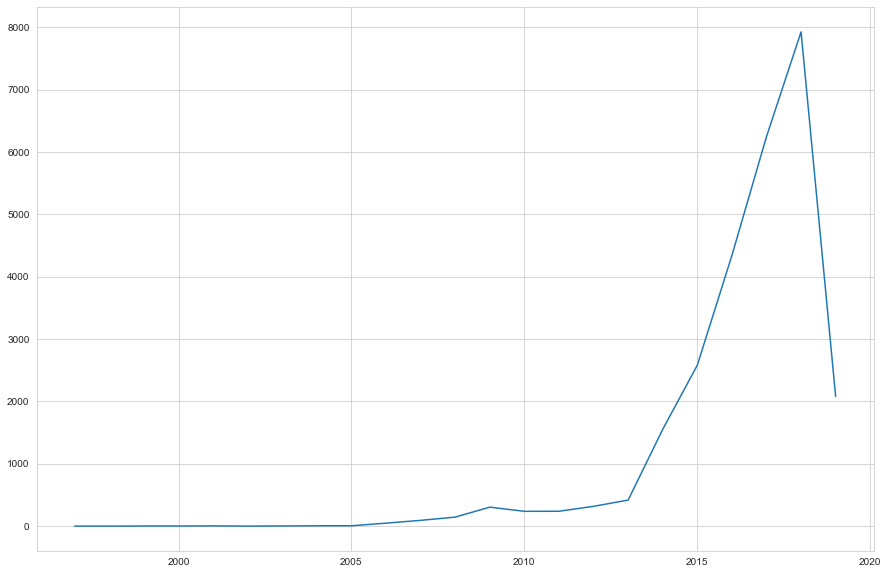

In [56]:
extra_df['release_year'].value_counts()
extra_df['release_year'].value_counts().sort_index().plot(kind='line')

## Ranking values

### Top games based on `owners` and `positive_ratings`

## Comparing groups

### Number of `developers` by `publisher`

In [38]:
main_df.groupby('developer')['name'].nunique().sort_values(ascending=False)

developer
Choice of Games             94
Ripknot Systems             62
Laush Dmitriy Sergeevich    51
Nikita "Ghost_RUS"          50
Dexion Games                45
                            ..
Hio Giang                    1
Hippomancer                  1
Hippopo Entertainment        1
Hiqosoft                     1
黄昏フロンティア                     1
Name: name, Length: 16772, dtype: int64

## Top rated games per `owners`

# Bivariate analysis

## Correlation heatmap (`owners`, `total_ratings`)

# Answering the KBQs

## As a game developer or publisher

1. What should a company make for their next game?
2. Compare free to play games and paid games in terms of `total_revenue` and `ratings` 

    Definitions:
    \begin{align}
    \text{total revenue} &= \text{midpoint of owners} \times \text{price}
    \end{align}
    
    \begin{align}
    \text{ratings} &= \frac{\text{positive ratings}}{\text{total ratings}} \times 100
    \end{align}
    
    Let's use $\geq 80\%$ as high score?
3. What are the kind of paid games with lowest `total_revenue` and `ratings`?

## Highest rated games by `owners` group

For the casual gamer:
- Get the games with the highest `total_ratings` then highest `ratings`.

For the connoisseur:
- Get the games with the highest `ratings` then highest `total_ratings`.

In [60]:
ratings_by_owners = (main_df.groupby(['owners', 'name'])
                     [['total_ratings', 'ratings']]
                     .sum()
                     .reset_index(level='name'))

# Indices of h_rated_by_owners are owner groups in descending order
h_rated_by_owners = np.array([ratings_by_owners.loc[idx] 
                              for idx in 
                              ratings_by_owners
                              .index
                              .unique()
                              .sort_values(ascending=False)], dtype='object')


ratings_by_owners

,name,total_ratings,ratings
owners,,,
10000,!LABrpgUP!,19,57.89
10000,"""BUTTS: The VR Experience""",58,77.59
10000,"""TWO DRAW""",8,62.50
10000,#CuteSnake,33,45.45
10000,#CuteSnake 2,19,73.68
...,...,...,...
35000000,Unturned,324056,90.29
35000000,Warframe,246809,91.79
75000000,Counter-Strike: Global Offensive,3046717,86.80


In [62]:
# Casual
h_rated_by_owners[3].sort_values(['total_ratings', 'ratings'], ascending=False)

,name,total_ratings,ratings
owners,,,
15000000,Grand Theft Auto V,468369,70.26
15000000,Garry's Mod,380154,95.68
15000000,PAYDAY 2,365180,84.52
15000000,Left 4 Dead 2,260207,96.76
15000000,The Elder Scrolls V: Skyrim,252254,94.07
15000000,Z1 Battle Royale,203098,54.87
15000000,Paladins®,201987,83.96
15000000,Portal 2,140111,98.65
15000000,Counter-Strike,127873,97.39


In [80]:
main_df[main_df['name'].str.contains('Tensei')]

,appid,name,release_date,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,negative_ratings,average_playtime,median_playtime,owners,price,price_range,release_year,total_ratings,ratings,total_revenue


In [68]:
# Connoisseur
h_rated_by_owners[4].sort_values(['ratings', 'total_ratings'], ascending=False)

,name,total_ratings,ratings
owners,,,
7500000,The Witcher® 3: Wild Hunt,207728,97.69
7500000,Terraria,263397,97.04
7500000,Wallpaper Engine,65570,97.03
7500000,Euro Truck Simulator 2,182594,96.81
7500000,Life is Strange - Episode 1,123130,96.35
7500000,Don't Starve Together,112807,96.27
7500000,Half-Life,28855,96.19
7500000,Sid Meier's Civilization® V,134595,95.87
7500000,Tomb Raider,97612,95.80
